<a href="https://colab.research.google.com/github/AlexKressner/Statistik/blob/main/Wahrscheinlichkeitsrechnung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
number_of_trials = 2
heads = 0
tails = 0
ratio = []
p = 0.5

In [34]:
for trial in range(1,number_of_trials+1):
  result = bernoulli.rvs(p)
  if result == 1:
    heads +=1
  else:
    tails +=1
  ratio.append([trial,heads/trial])

In [35]:
heads, tails

(1, 1)

In [36]:
y = [point[1] for point in ratio]
x = [point[0] for point in ratio]

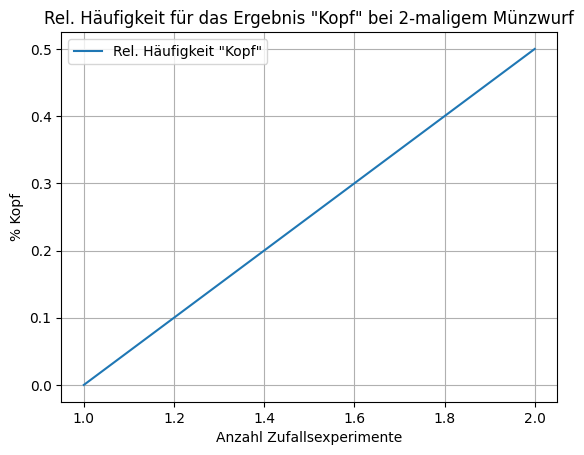

In [37]:
# Plot the line
plt.plot(x, y, label='Rel. Häufigkeit "Kopf"')

# Add title and labels to the axes
plt.title(f'Rel. Häufigkeit für das Ergebnis "Kopf" bei {number_of_trials}-maligem Münzwurf')
plt.xlabel("Anzahl Zufallsexperimente")
plt.ylabel("% Kopf")

# Display the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Obstgarten

In [46]:
import random

In [54]:
trials = 10
rabe_win = 0
kind_win = 0
ratio = []

In [55]:
wuerfel = ["Rabe", "Gelb", "Rot", "Grün", "Lila"]
fruits = ["Gelb", "Rot", "Grün", "Lila"]
initial_state = {"Rabe":4, "Gelb":3, "Rot":0, "Grün":0, "Lila": 1}

In [56]:
for trial in range(trials):
  play = True
  # Spielsituation
  state = initial_state.copy()
  while play:
    wurf = random.choice(wuerfel)
    state[wurf] -= 1
    if state["Rabe"] == 0:
      rabe_win += 1
      play = False
    if all(state[fruit] <= 0 for fruit in fruits):
      kind_win += 1
      play = False
    if not play:
      ratio.append([trial, rabe_win/(trial+1)])

In [57]:
rabe_win, kind_win, ratio[-1][1]

(3, 7, 0.3)

In [58]:
ratio

[[0, 0.0],
 [1, 0.5],
 [2, 0.3333333333333333],
 [3, 0.25],
 [4, 0.4],
 [5, 0.3333333333333333],
 [6, 0.2857142857142857],
 [7, 0.25],
 [8, 0.2222222222222222],
 [9, 0.3]]

In [59]:
y = [point[1] for point in ratio]
x = [point[0] for point in ratio]

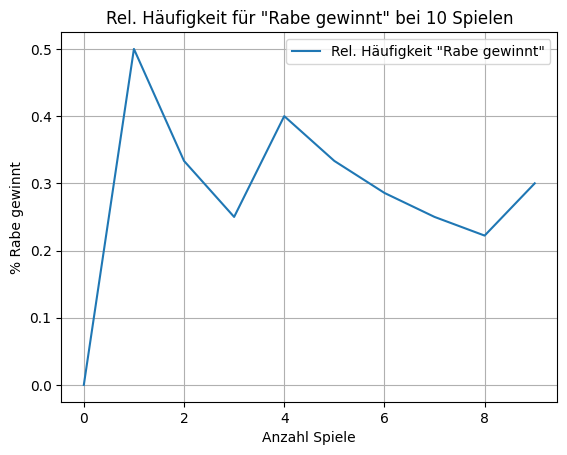

In [60]:
# Plot the line
plt.plot(x, y, label='Rel. Häufigkeit "Rabe gewinnt"')

# Add title and labels to the axes
plt.title(f'Rel. Häufigkeit für "Rabe gewinnt" bei {trials} Spielen')
plt.xlabel("Anzahl Spiele")
plt.ylabel("% Rabe gewinnt")

# Display the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Binomialverteilung

In [ ]:
import scipy
import numpy as np

### Beispiel "Münzwurf"

In [ ]:
N=10 # Anzahl der Experimente
k=4 # Anzahl Erfolge (Kopf)
p=0.5 # Erfolgswahrscheinlichkeit

In [ ]:
scipy.stats.binom.pmf(k,N,p)

In [ ]:
np.sum(scipy.stats.binom.pmf(0,N,p)+scipy.stats.binom.pmf(1,N,p)+scipy.stats.binom.pmf(2,N,p)+scipy.stats.binom.pmf(3,N,p)+scipy.stats.binom.pmf(4,N,p))

In [ ]:
scipy.stats.binom.cdf(k,N,p)

In [ ]:
l = []
for k in range(N+1):
  l.append([k,scipy.stats.binom.pmf(k,N,p)])

In [ ]:
l

In [ ]:
x = pd.DataFrame(l, columns=["k","Wahrscheinlichkeit"])

In [ ]:
x.plot(x="k", y="Wahrscheinlichkeit", kind="bar")

### Beispiel Flugzeugmotor

In [ ]:
N=4 # Anzahl Motoren
p=0.95 # Erfolgswahrscheinlichkeit

In [ ]:
scipy.stats.binom.pmf(2,N,p)+scipy.stats.binom.pmf(3,N,p)+scipy.stats.binom.pmf(4,N,p)

In [ ]:
probs = []

In [ ]:
for p in range(1,100):
  prob = p/100
  prob = np.sum(scipy.stats.binom.pmf(2,N,prob)+scipy.stats.binom.pmf(3,N,prob)+scipy.stats.binom.pmf(4,N,prob))
  probs.append([p, prob])


In [ ]:
x = pd.DataFrame(probs, columns=["k","Wahrscheinlichkeit"])

In [ ]:
x.plot(x="k", y="Wahrscheinlichkeit", kind="line")

### Multinomialverteilung

In [ ]:
scipy.stats.multinomial.pmf([3,2,3,2],10,[0.2,0.2,0.2,0.4])

## Zentraler Grenzwertsatz

In [ ]:
num_trials = 20 # Anzahl Zufallsexperimente
num_samples = 1 # Anzahl Zufallsvariablen

In [ ]:
# Parameter Binomialverteilung
N = 10
p = 0.5

In [ ]:
# Parameter Betaverteilung
a = 1
b = 5

In [ ]:
binom_sample_sum = []
beta_sample_sum = []

In [ ]:
for trial in range(num_trials):
  binom_sample_sum.append([trial, np.sum(scipy.stats.binom.rvs(N,p,size=num_samples))])
  beta_sample_sum.append([trial, np.sum(scipy.stats.beta.rvs(a,b,size=num_samples))])

In [ ]:
binom = pd.DataFrame(binom_sample_sum, columns=["Trial","Summe"])
beta = pd.DataFrame(beta_sample_sum, columns=["Trial","Summe"])

In [ ]:
binom["Summe"].plot(kind="hist", edgecolor="black", bins=20)

In [ ]:
beta["Summe"].plot(kind="hist", edgecolor="black", bins=20)

## Beispiel Qualitätskontrolle
Sei $Y$ der Durchmesser ein Schraube mit $Y\sim N(\mu,σ^2)$

In [ ]:
mue = 5
sigma = 0.1

In [ ]:
lower = 4.9
upper = 5.1

In [ ]:
# Wahrscheinlichkeit P(Y<=4,9)
prob_lower = scipy.stats.norm.cdf(lower, mue, sigma)

In [ ]:
# Wahrscheinlichkeit P(Y<=5,1)
prob_upper = scipy.stats.norm.cdf(upper, mue, sigma)

In [ ]:
# Wahrscheinlichkeit P(4,9<Y<=5,1)
prob_upper - prob_lower

In [ ]:
# Finde den Durchmesser, unter dem 95% aller Schrauben liegen, d.h. 95%-Quantil, F^(-1)(0,95)
scipy.stats.norm.ppf(0.95,mue,sigma), mue + sigma*scipy.stats.norm.ppf(0.95,0,1)

## Beispiel Bestandsmanagement

In [ ]:
mue = 100
sigma = 20

In [ ]:
inventory = []

In [ ]:
for sl in range(5000,9999):
  sl = sl/10000
  inventory.append([sl,scipy.stats.norm.ppf(sl, mue, sigma)])

In [ ]:
inventory = pd.DataFrame(inventory, columns=["ServiceLevel","Bestand"])

In [ ]:
inventory.plot(x="ServiceLevel", y="Bestand", kind="line")

In [ ]:
mue = 86.25
sigma = 36.224

In [ ]:
servicelevel = []

In [ ]:
for b in range(50,250):
  servicelevel.append([b,scipy.stats.norm.cdf(b, mue, sigma)])

In [ ]:
servicelevel = pd.DataFrame(servicelevel, columns=["Bestand","ServiceLevel"])

In [ ]:
servicelevel.plot(y="ServiceLevel", x="Bestand", kind="line")

## **Exkurs: Bayes Schätzer**

## **Prior** zum Münzwurf, **$P(θ)$**, Modellierung über Betaverteilung

In [ ]:
# Verteilungsparameter der Betaverteilung
# Über die Wahl der Parameter drücken wir unser aktuelles Wissen zum Ausgang des Zufallsexperiments aus bevor wir die Daten beobachten
a = 2 # Anzahl Kopf
b = 2 # Anzahl Zahl

In [ ]:
p = np.arange(1,999)/1000

In [ ]:
prior = scipy.stats.beta.pdf(p, a, b)

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    p,
    prior,
    ms=1,
    label=f"Prior Beta({a},{b})"
    )
ax.set_title('Dichtefunktion für den Verteilungsparameter $p$ der Bernoulli-Verteilung (betaverteilt)')
ax.set_xlabel('p')
ax.set_ylabel('f(p)')
ax.legend()
plt.show()

## **Likelihood Funktion** zum Münzwurf, **$P(D|θ)$**, Modellierung über Bernoulliverteilung

In [ ]:
# Wir nehmen an, dass die realisierten Daten die folgenden sind:
N_Kopf = 4
N_Zahl = 1

In [ ]:
llh = scipy.stats.bernoulli.pmf(1,p)**N_Kopf * (1-scipy.stats.bernoulli.pmf(1,p))**N_Zahl

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    p,
    llh,
    ms=1,
    label=f"LLH Bern({N_Kopf},{N_Zahl})",
    color="red"
    )
ax.set_title(f"Wahrscheinlichkeit {N_Kopf}-mal Kopf und {N_Zahl}-mal Zahl zu beobachten in Abhängigkeit von $p$")
ax.set_xlabel('p')
ax.set_ylabel('f(p)')
ax.legend()
plt.show()

## **Posterior** zum Münzwurf, **$P(θ|D)$**$=\frac{P(D|θ)P(θ)}{P(D)}$

In [ ]:
p_D = (llh*prior).sum()

In [ ]:
posterior = llh * prior / p_D

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    p,
    posterior,
    ms=1,
    label="Posterior",
    color="black",
    linestyle='--'
    )
ax.set_xlabel('p')
ax.set_ylabel('f(p)')
ax.legend()
plt.show()

### **Posterior mode**, $\hat{θ}=\text{arg max}_θ P(θ|D)$

In [ ]:
p[posterior.argmax()]

### **Posterior mean**, $E[θ|D] = \int θ P(θ|D)P \mathrm{d}θ$

In [ ]:
(p * posterior).sum()

### **Posterior Prediction**,
$P(y=1|D)=\int_{0}^{1}P(y=1|θ)P(θ|D)\mathrm{d}θ$ für Zahl und

$P(y=0|D)=\int_{0}^{1}P(y=0|θ)P(θ|D)\mathrm{d}θ$ für Kopf

In [ ]:
(scipy.stats.bernoulli.pmf(1, p) * posterior).sum()

In [ ]:
(scipy.stats.bernoulli.pmf(0, p) * posterior).sum()